In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
#Reading the data

In [125]:
df=pd.read_csv("height-weight.csv")

In [126]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


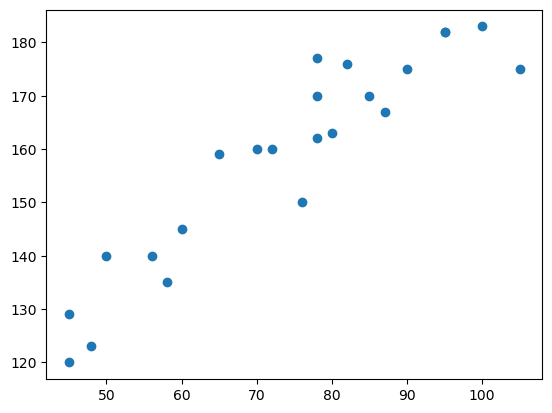

In [127]:
plt.scatter(df.Weight ,df.Height)

In [128]:
#Divide the Data into X,Y

In [129]:
x=df[["Weight"]]
y=df["Height"]

In [130]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [131]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [132]:
#TrAIN TEST SPLIT

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [134]:
x_train

,Weight
16,50
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45


In [135]:
y_train

16    140
10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [136]:
#Scalling

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler=StandardScaler()

In [139]:
x_train

,Weight
16,50
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45


In [140]:
#Train>>>> Fit and transform

In [141]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [142]:
x_train

array([[-1.4611864 ],
       [ 0.44730196],
       [-0.26838118],
       [-1.58046693],
       [ 0.08946039],
       [ 0.32802144],
       [ 0.92442405],
       [-0.98406431],
       [ 0.62622274],
       [-1.75938771],
       [ 0.20874091],
       [-0.14910065],
       [-1.10334484],
       [ 0.20874091],
       [ 1.22262536],
       [ 1.81902797],
       [ 1.22262536],
       [ 0.20874091]])

In [143]:
x_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

In [144]:
#Model Training

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
reg=LinearRegression()

In [147]:
reg

LinearRegression()

In [148]:
reg.fit(x_train,y_train)

LinearRegression()

In [149]:
print("the coef is",reg.coef_)

the coef is [17.73635106]


In [150]:
print("the intercept is",reg.intercept_)

the intercept is 158.88888888888889


In [151]:
#y_pred= intercept +coef(x)

In [152]:
#159+x_train(17)

In [153]:
reg.predict(x_train)

array([132.97277388, 166.82239348, 154.12878613, 130.85717266,
       160.47558981, 164.70679226, 175.28479838, 141.43517878,
       169.99579532, 127.68377082, 162.59119103, 156.24438736,
       139.31957756, 162.59119103, 180.57380145, 191.15180757,
       180.57380145, 162.59119103])

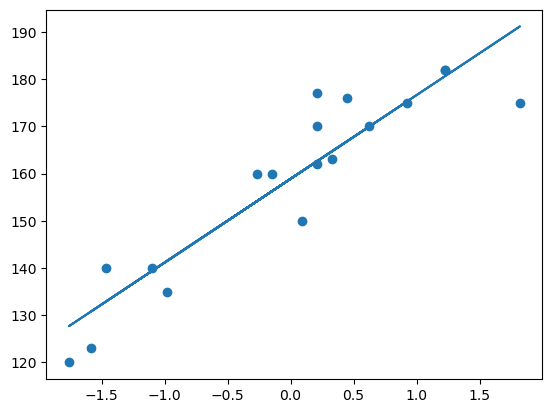

In [154]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train))

In [155]:
y_pred_test=reg.predict(x_test)

In [156]:
reg.predict(x_test)

array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
       172.11139655])

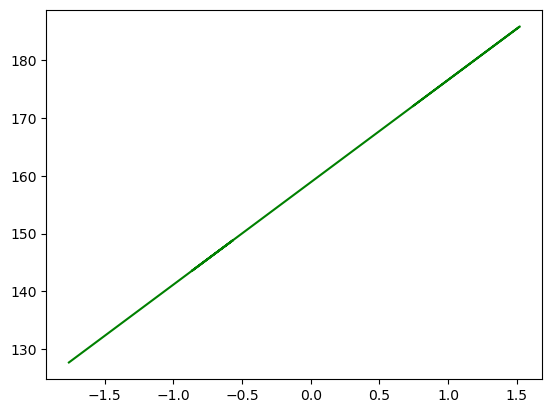

In [157]:

plt.plot(x_test,y_pred_test,"g")

In [158]:
x_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

In [159]:
y_test

20    129
17    159
3     145
13    183
19    167
Name: Height, dtype: int64

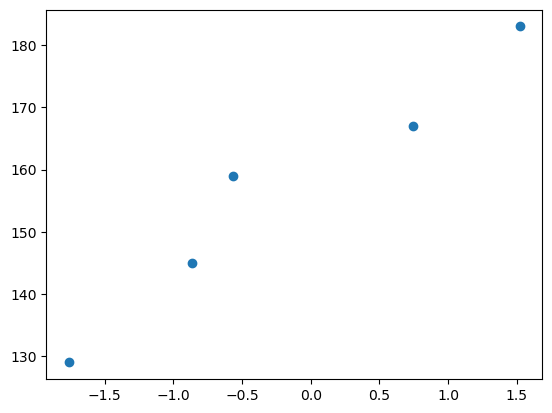

In [160]:
plt.scatter(x_test,y_test)

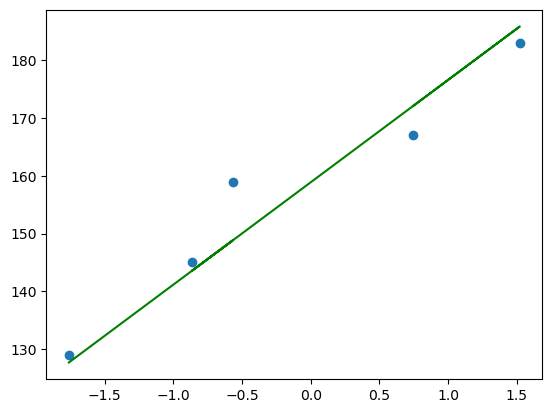

In [161]:
plt.scatter(x_test,y_test)

plt.plot(x_test,y_pred_test,"g")

In [162]:
#Evaluation METRICS

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [164]:
mean_squared_error(y_test,y_pred_test)

28.276946048811993

In [165]:
mean_absolute_error(y_test,y_pred_test)

4.179973432576941

In [166]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

5.317607173232336

In [167]:
r2_score(y_test,y_pred_test)

0.9171832648523548

In [168]:
#ADJ  =1-(1-rsq)*N-1/n-p-1

In [169]:
score= r2_score(y_test ,y_pred_test)

In [170]:
score

0.9171832648523548

In [171]:
x_test.shape[1]

1

In [172]:
y_test

20    129
17    159
3     145
13    183
19    167
Name: Height, dtype: int64

In [173]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8895776864698064